In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'
%reload_ext lab_black

In [2]:
import logging
import string
import sys
import os

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from src.figure_utilities import (
    PAGE_HEIGHT,
    ONE_COLUMN,
    TWO_COLUMN,
    save_figure,
    set_figure_defaults,
)
from src.parameters import (
    STATE_COLORS,
    TRANSITION_TO_CATEGORY,
    STATE_ORDER,
    PROBABILITY_THRESHOLD,
)

set_figure_defaults()

In [3]:
from src.analysis import load_all_replay_info


replay_info = load_all_replay_info(
    n_unique_spiking=2,
    data_type="clusterless",
    dim="1D",
    probability_threshold=PROBABILITY_THRESHOLD,
    speed_threshold=4,
    exclude_interneuron_spikes=False,
)

classified_replay_info = replay_info.loc[
    replay_info.is_classified & (replay_info.duration_classified > 0.015)
]

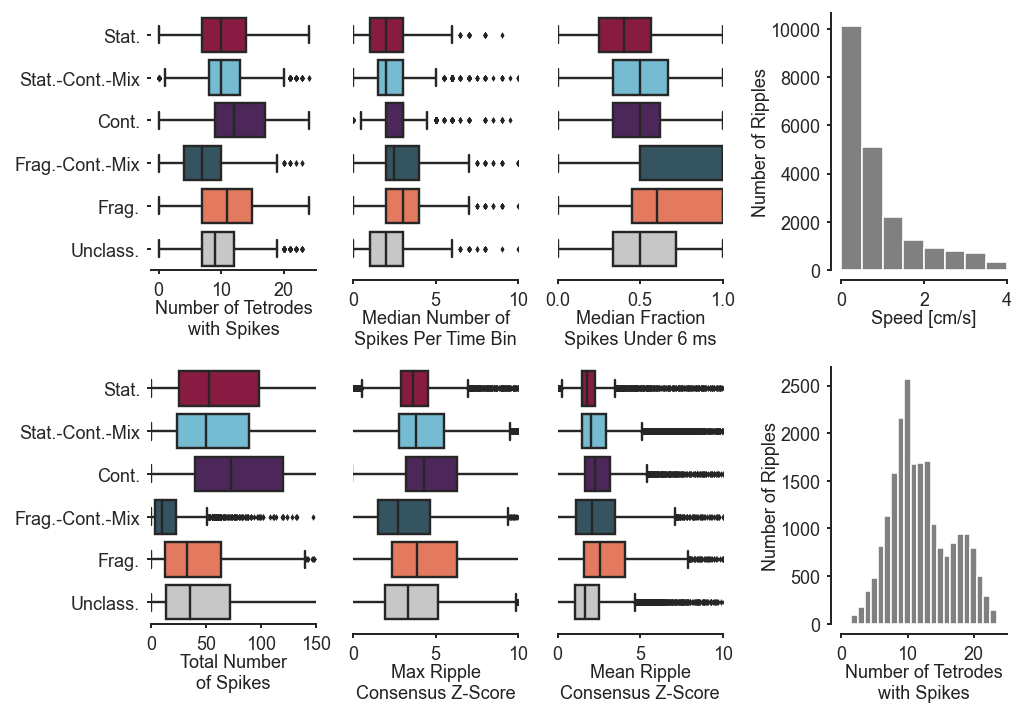

In [11]:
from src.visualization import _plot_category

saturation, fliersize = 0.7, 1

fig, axes = plt.subplots(
    nrows=2, ncols=4, figsize=(TWO_COLUMN, PAGE_HEIGHT / 2), constrained_layout=True
)


_plot_category(
    classified_replay_info,
    "n_unique_spiking",
    kind="box",
    ax=axes[0, 0],
    fliersize=fliersize,
    saturation=saturation,
)
axes[0, 0].set_xlabel("Number of Tetrodes\nwith Spikes")

_plot_category(
    classified_replay_info,
    "max_ripple_consensus_trace_zscore",
    kind="box",
    ax=axes[1, 1],
    fliersize=fliersize,
    saturation=saturation,
)
axes[1, 1].set_xlim((0, 10))
axes[1, 1].set_xlabel("Max Ripple\nConsensus Z-Score")
sns.despine(ax=axes[1, 1], offset=5)
axes[1, 1].set_yticks([])
axes[1, 1].spines["left"].set_visible(False)

_plot_category(
    classified_replay_info,
    "n_total_spikes",
    kind="box",
    ax=axes[1, 0],
    fliersize=fliersize,
    saturation=saturation,
)

axes[1, 0].set_xlim((0, 150))
axes[1, 0].set_xlabel("Total Number\nof Spikes")


_plot_category(
    classified_replay_info,
    "median_spikes_per_bin",
    kind="box",
    ax=axes[0, 1],
    fliersize=fliersize,
    saturation=saturation,
)

axes[0, 1].set_xlim((0, 10))
axes[0, 1].set_xlabel("Median Number of\nSpikes Per Time Bin")

sns.despine(ax=axes[0, 1], offset=5)
axes[0, 1].set_yticks([])
axes[0, 1].spines["left"].set_visible(False)


_plot_category(
    classified_replay_info,
    "median_fraction_spikes_under_6_ms",
    kind="box",
    ax=axes[0, 2],
    fliersize=fliersize,
    saturation=saturation,
)

axes[0, 2].set_xlabel("Median Fraction\nSpikes Under 6 ms")
axes[0, 2].set_xlim((0, 1))

sns.despine(ax=axes[0, 2], offset=5)
axes[0, 2].set_yticks([])
axes[0, 2].spines["left"].set_visible(False)


_plot_category(
    classified_replay_info,
    "mean_ripple_consensus_trace_zscore",
    kind="box",
    ax=axes[1, 2],
    fliersize=fliersize,
    saturation=saturation,
)

axes[1, 2].set_xlabel("Mean Ripple\nConsensus Z-Score")
axes[1, 2].set_xlim((0, 10))

sns.despine(ax=axes[1, 2], offset=5)
axes[1, 2].set_yticks([])
axes[1, 2].spines["left"].set_visible(False)


axes[0, 3].hist(
    classified_replay_info.actual_speed, bins=np.arange(0, 4.5, 0.5), facecolor="grey",
)
axes[0, 3].set_ylabel("Count")
axes[0, 3].set_xlabel("Speed [cm/s]")
axes[0, 3].set_xlim((0, 4))
sns.despine(offset=5, ax=axes[0, 3])

axes[0, 3].hist(
    classified_replay_info.actual_speed, bins=np.arange(0, 4.5, 0.5), facecolor="grey",
)
axes[0, 3].set_ylabel("Number of Ripples")
axes[0, 3].set_xlabel("Speed [cm/s]")
axes[0, 3].set_xlim((0, 4))
sns.despine(offset=5, ax=axes[0, 3])


axes[1, 3].hist(
    classified_replay_info.n_unique_spiking,
    bins=np.arange(0.5, 25.5, 1),
    facecolor="grey",
)
axes[1, 3].set_ylabel("Number of Ripples")
axes[1, 3].set_xlabel("Number of Tetrodes\nwith Spikes")
axes[1, 3].set_xlim((0, 25))
sns.despine(offset=5, ax=axes[1, 3])

save_figure(os.path.join("Figure5-supplemental3", "figure5_additional_summary"))